In [1]:
!pip install metpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 18.1 MB/s eta 0:00:00


In [14]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

--2025-04-26 23:45:40--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 154615621 (147M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 147.45M  67.6MB/s    in 2.2s    

2025-04-26 23:45:42 (67.6 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [154615621/154615621]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONP

In [15]:
!conda install conda-forge::cartopy

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda-forge::cartopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |         openblas          46 KB
    ca-certificates-2025.2.25  |       h06a4308_0         129 KB
    cartopy-0.24.0             |  py312hf9745cd_0         1.5 MB  conda-forge
    conda-25.3.1               |  py312h06a4308_0         1.1 MB
    contourpy-1.3.1            |  py312hdb19cb5_0         276 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.55.3           |  py312h5eee18b_0         2.9 MB
    freetype-2.13.3            |       h4a9f257_0         686 KB
    geos-3.10.6                |       h6a678d5_0         1.5 MB
    jpeg-9e                  

In [20]:
import numpy as np
import xarray as xr

# Any import of metpy will activate the accessors
import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.units import units

In [86]:
# Open the netCDF file as a xarray Dataset
data = xr.open_dataset(get_test_data('irma_gfs_example.nc', False))

# View a summary of the Dataset
data

<xarray.Dataset> Size: 67MB
Dimensions:                              (time1: 9, latitude: 81,
                                          isobaric3: 31, isobaric1: 21,
                                          longitude: 131)
Coordinates:
  * time1                                (time1) datetime64[ns] 72B 2017-09-0...
    reftime                              datetime64[ns] 8B ...
  * latitude                             (latitude) float32 324B 50.0 ... 10.0
  * isobaric3                            (isobaric3) float64 248B 100.0 ... 1...
  * isobaric1                            (isobaric1) float64 168B 1e+04 ... 1...
  * longitude                            (longitude) float32 524B 250.0 ... 3...
Data variables:
    Vertical_velocity_pressure_isobaric  (time1, isobaric1, latitude, longitude) float32 8MB ...
    Relative_humidity_isobaric           (time1, isobaric3, latitude, longitude) float32 12MB ...
    Temperature_isobaric                 (time1, isobaric3, latitude, longitude) float32 12MB ...
    u-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 12MB ...
    v-component_of_wind_isobaric         (time1, isobaric3, latitude, longitude) float32 12MB ...
    Geopotential_height_isobaric         (time1, isobaric3, latitude, longitude) float32 12MB ...
    LatLon_361X720-0p25S-180p00E         int32 4B ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

In [22]:
temperature = data['Temperature_isobaric']
temperature

<xarray.DataArray 'Temperature_isobaric' (time1: 9, isobaric3: 31,
                                          latitude: 81, longitude: 131)> Size: 12MB
[2960469 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 72B 2017-09-05T12:00:00 ... 2017-09-06T...
    reftime    datetime64[ns] 8B ...
  * latitude   (latitude) float32 324B 50.0 49.5 49.0 48.5 ... 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 248B 100.0 200.0 300.0 ... 9.75e+04 1e+05
  * longitude  (longitude) float32 524B 250.0 250.5 251.0 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [23]:
temperature.metpy.time

<xarray.DataArray 'time1' (time1: 9)> Size: 72B
array(['2017-09-05T12:00:00.000000000', '2017-09-05T15:00:00.000000000',
       '2017-09-05T18:00:00.000000000', '2017-09-05T21:00:00.000000000',
       '2017-09-06T00:00:00.000000000', '2017-09-06T03:00:00.000000000',
       '2017-09-06T06:00:00.000000000', '2017-09-06T09:00:00.000000000',
       '2017-09-06T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time1    (time1) datetime64[ns] 72B 2017-09-05T12:00:00 ... 2017-09-06T12...
    reftime  datetime64[ns] 8B ...
Attributes:
    standard_name:  time
    long_name:      time
    udunits:        Hour since 2017-09-05T12:00:00Z
    _metpy_axis:    time

In [24]:
x, y = temperature.metpy.coordinates('x', 'y')

In [25]:
heights = data['Geopotential_height_isobaric'].metpy.sel(
    time='2017-09-05 18:00',
    vertical=50000.
)

In [26]:
heights

<xarray.DataArray 'Geopotential_height_isobaric' (latitude: 81, longitude: 131)> Size: 42kB
[10611 values with dtype=float32]
Coordinates:
    time1      datetime64[ns] 8B 2017-09-05T18:00:00
    reftime    datetime64[ns] 8B ...
  * latitude   (latitude) float32 324B 50.0 49.5 49.0 48.5 ... 11.0 10.5 10.0
    isobaric3  float64 8B 5e+04
  * longitude  (longitude) float32 524B 250.0 250.5 251.0 ... 314.0 314.5 315.0
Attributes:
    long_name:                      Geopotential height @ Isobaric surface
    units:                          gpm
    Grib_Variable_Id:               VAR_0-3-5_L100
    Grib2_Parameter:                [0 3 5]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Geopotential height
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

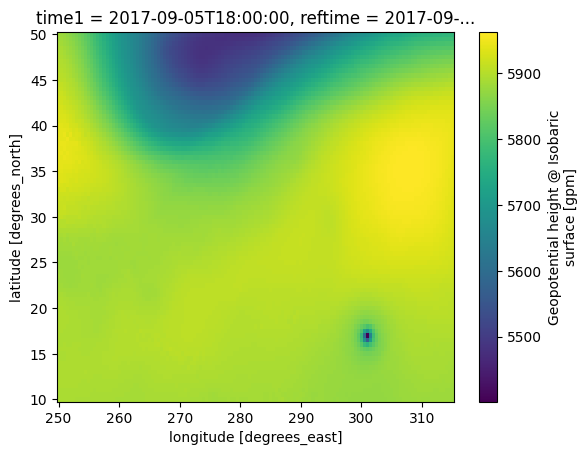

In [27]:
heights.plot()

In [28]:
# Parse full dataset
data_parsed = data.metpy.parse_cf()

# Parse subset of dataset
data_subset = data.metpy.parse_cf([
    'u-component_of_wind_isobaric',
    'v-component_of_wind_isobaric',
    'Vertical_velocity_pressure_isobaric'
])

# Parse single variable
relative_humidity = data.metpy.parse_cf('Relative_humidity_isobaric')

In [29]:
temperature = data['Temperature_isobaric'].metpy.assign_crs(
    grid_mapping_name='latitude_longitude',
    earth_radius=6371229.0
)

temperature

<xarray.DataArray 'Temperature_isobaric' (time1: 9, isobaric3: 31,
                                          latitude: 81, longitude: 131)> Size: 12MB
[2960469 values with dtype=float32]
Coordinates:
  * time1      (time1) datetime64[ns] 72B 2017-09-05T12:00:00 ... 2017-09-06T...
    reftime    datetime64[ns] 8B ...
  * latitude   (latitude) float32 324B 50.0 49.5 49.0 48.5 ... 11.0 10.5 10.0
  * isobaric3  (isobaric3) float64 248B 100.0 200.0 300.0 ... 9.75e+04 1e+05
  * longitude  (longitude) float32 524B 250.0 250.5 251.0 ... 314.0 314.5 315.0
    metpy_crs  object 8B Projection: latitude_longitude
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [31]:
# pyproj CRS, useful for projection transformations and forward/backward azimuth and great
# circle calculations
temperature.metpy.pyproj_crs

<Geographic 2D CRS: {"$schema": "https://proj.org/schemas/v0.2/projjso ...>
Name: undefined
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: undefined
- Ellipsoid: undefined
- Prime Meridian: Greenwich

In [32]:
heights = data_parsed.metpy.parse_cf('Geopotential_height_isobaric').metpy.sel(
    time='2017-09-05 18:00',
    vertical=500 * units.hPa
)
u_g, v_g = mpcalc.geostrophic_wind(heights)
u_g

Magnitude,[[2.335358857943004 4.609818772243051 2.9362541310167085 ... 22.890679520455105 22.89183582951334 23.492345666231863] [4.389668010977423 4.64400083248881 4.4211198560793346 ... 23.124872038368 23.12526033275193 23.284461030186655] [5.544833947878677 4.999466098915912 5.352351177656087 ... 22.979391208389295 22.94731074668553 22.754827976463563] ... [-3.42134235279585 -3.296001452491681 -3.169113133663004 ... -7.60556203708582 -6.844232124113761 -4.564884640773554] [-3.8480188676835207 -2.124106414960525 -2.1224861964901662 ... -5.573551538874314 -6.104983197233955 -5.309455928164853] [-2.6474331699294553 2.229148931154196 -2.7851609070998764 ... 0.27885615919783663 -4.182842387956802 -7.241758426947527]]
Units,meter/second


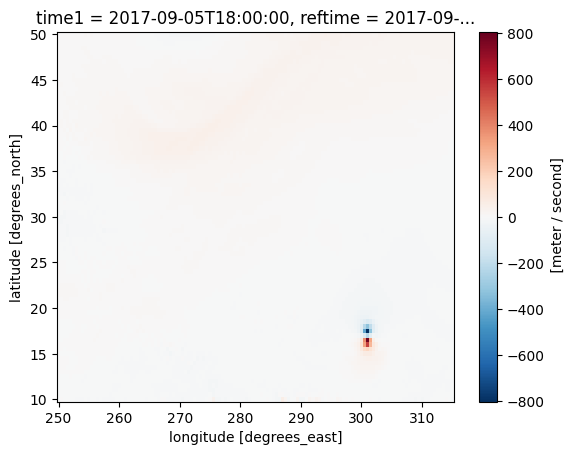

In [33]:
u_g.plot()

In [94]:
lats = data['latitude'].values
lons = data['longitude'].values
times = data['time1'].values

In [95]:
data_at_point = data.metpy.sel(
    time1='2017-09-05 12:00',
    latitude=30 * units.degrees_north,
    longitude=260 * units.degrees_east
)
dewpoint = mpcalc.dewpoint_from_relative_humidity(
    data_at_point['Temperature_isobaric'],
    data_at_point['Relative_humidity_isobaric']
)
cape, cin = mpcalc.surface_based_cape_cin(
    data_at_point['isobaric3'][::-1],
    data_at_point['Temperature_isobaric'][::-1],
    dewpoint[::-1]
)
cape

<Quantity(2106.3345, 'joule / kilogram')>

In [97]:
data_at_point = data.metpy.sel(
    time1=times[0],
    latitude=lats[0] * units.degrees_north,
    longitude=lons[0] * units.degrees_east
)
dewpoint = mpcalc.dewpoint_from_relative_humidity(
    data_at_point['Temperature_isobaric'],
    data_at_point['Relative_humidity_isobaric']
)
cape, cin = mpcalc.surface_based_cape_cin(
    data_at_point['isobaric3'][::-1],
    data_at_point['Temperature_isobaric'][::-1],
    dewpoint[::-1]
)
cape

<Quantity(0, 'joule / kilogram')>

In [132]:
# from tqdm import tqdm

# # Prepare all (t, i, j) combinations
# tasks = [(t, i, j) for t in range(len(times)) for i in range(len(lats)) for j in range(len(lons))]

# # Loop with a single tqdm
# for t, i, j in tqdm(tasks, desc="Processing CAPE/CIN", leave=True):
#     try:
#         data_at_point = data.metpy.sel(
#             time1=times[t],
#             latitude=lats[i] * units.degrees_north,
#             longitude=lons[j] * units.degrees_east
#         )

#         dewpoint = mpcalc.dewpoint_from_relative_humidity(
#             data_at_point['Temperature_isobaric'],
#             data_at_point['Relative_humidity_isobaric']
#         )

#         cape, cin = mpcalc.surface_based_cape_cin(
#             data_at_point['isobaric3'][::-1],
#             data_at_point['Temperature_isobaric'][::-1],
#             dewpoint[::-1]
#         )
#         print(cape)
#         cape_array[t, i, j] = cape.magnitude
#         cin_array[t, i, j] = cin.magnitude

#     except Exception as e:
#         cape_array[t, i, j] = np.nan
#         cin_array[t, i, j] = np.nan
#         #print(f"Error at time {times[t]}, lat {lats[i]}, lon {lons[j]}: {e}")

In [48]:
# Create xarray Dataset
cape_cin_ds = xr.Dataset(
    {
        "CAPE": (("time", "latitude", "longitude"), cape_array),
        "CIN": (("time", "latitude", "longitude"), cin_array),
    },
    coords={
        "time": times,
        "latitude": lats,
        "longitude": lons,
    }
)

<xarray.DataArray 'Temperature_isobaric' (isobaric3: 31)> Size: 124B
[31 values with dtype=float32]
Coordinates:
    time1      datetime64[ns] 8B 2017-09-05T12:00:00
    reftime    datetime64[ns] 8B ...
    latitude   float32 4B 30.0
  * isobaric3  (isobaric3) float64 248B 1e+05 9.75e+04 9.5e+04 ... 200.0 100.0
    longitude  float32 4B 260.0
Attributes:
    long_name:                      Temperature @ Isobaric surface
    units:                          K
    Grib_Variable_Id:               VAR_0-0-0_L100
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Forecast
    grid_mapping:                   LatLon_361X720-0p25S-180p00E

In [115]:
from tqdm import tqdm

# Prepare all (t, i, j) combinations
tasks = [(t, i, j) for t in range(len(times)) for i in range(len(lats)) for j in range(len(lons))]

# Loop over indices, not the actual tasks
for idx in range(len(tasks)):
    t, i, j = tasks[idx]
    try:
        data_at_point = data.metpy.sel(
            time1=times[t],
            latitude=lats[i] * units.degrees_north,
            longitude=lons[j] * units.degrees_east
        )

        dewpoint = mpcalc.dewpoint_from_relative_humidity(
            data_at_point['Temperature_isobaric'],
            data_at_point['Relative_humidity_isobaric']
        )

        cape, cin = mpcalc.surface_based_cape_cin(
            data_at_point['isobaric3'][::-1],
            data_at_point['Temperature_isobaric'][::-1],
            dewpoint[::-1]
        )
        # print(cape)
        cape_array[t, i, j] = cape.magnitude
        cin_array[t, i, j] = cin.magnitude

    except Exception:
        cape_array[t, i, j] = np.nan
        cin_array[t, i, j] = np.nan

/usr/local/lib/python3.11/dist-packages/metpy/calc/thermo.py:1403: RuntimeWarning: divide by zero encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)
/usr/local/lib/python3.11/dist-packages/metpy/calc/thermo.py:1404: RuntimeWarning: invalid value encountered in divide
  return mpconsts.nounit.zero_degc + 243.5 * val / (17.67 - val)
Processing CAPE/CIN:   5%|▍         | 4419/95499 [19:03<6:32:56,  3.86it/s]


In [116]:
# Create xarray Dataset
cape_cin_ds = xr.Dataset(
    {
        "CAPE": (("time", "latitude", "longitude"), cape_array),
        "CIN": (("time", "latitude", "longitude"), cin_array),
    },
    coords={
        "time": times,
        "latitude": lats,
        "longitude": lons,
    }
)

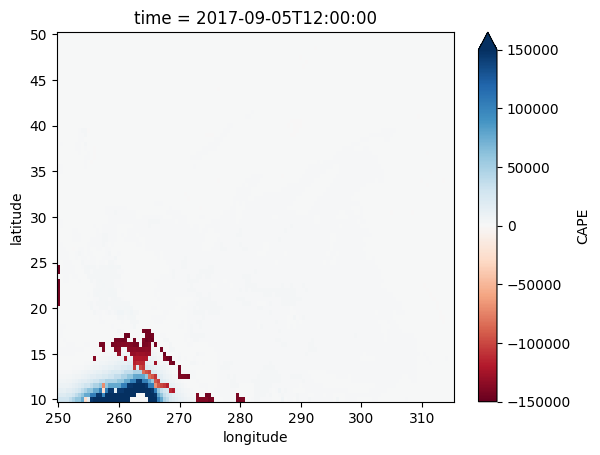

In [121]:
cape_cin_ds.CAPE.isel(time=0).plot(vmin=-150000, vmax=150000, cmap='RdBu')

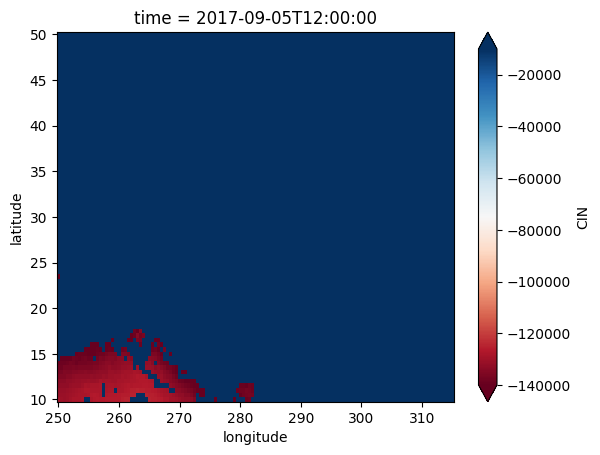

In [131]:
cape_cin_ds.CIN.isel(time=0).plot( cmap='RdBu', vmax=-10000, vmin=-140000)